## EDA - Haberman's Survival Data

## Assignment description

* Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
* Perform a similar analysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.
* Explain our objective.
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

## Dataset qualitive description

Dataset source: (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) (b) Date: March 4, 1999

Features
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
    
Axillary nodes drain lymph vessels from the lateral quadrants of the breast, and are clinically significant in     breast cancer.

Classes
* 1 (survived) = the patient survived 5 years or longer
* 2 (died) = the patient died within 5 year

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
haberman = pd.read_csv('./haberman.csv',
                           names = ["age", "operation_year", "axillary_nodes", "survival_status"])

# preprocessing to facilitate the analysis
haberman.loc[haberman.survival_status == 1, 'survival_status'] = 'survived'
haberman.loc[haberman.survival_status == 2, 'survival_status'] = 'died'

In [7]:
# first dataset visualization
print(haberman)
print(haberman.describe())

     age  operation_year  axillary_nodes survival_status
0     30              64               1        survived
1     30              62               3        survived
2     30              65               0        survived
3     31              59               2        survived
4     31              65               4        survived
5     33              58              10        survived
6     33              60               0        survived
7     34              59               0            died
8     34              66               9            died
9     34              58              30        survived
10    34              60               1        survived
11    34              61              10        survived
12    34              67               7        survived
13    34              60               0        survived
14    35              64              13        survived
15    35              63               0        survived
16    36              60       

### 1 High level statistics of the dataset

In [8]:
print(haberman.columns)
print(haberman.shape)
# number of points: 306
# number of features: 3
# number of classes: 2

gb = haberman.groupby('survival_status')
print(gb.count())

# data-points per class:
# 1 (the patient survived 5 years or longer): 225
# 2 (the patient died within 5 year): 81

Index(['age', 'operation_year', 'axillary_nodes', 'survival_status'], dtype='object')
(306, 4)
                 age  operation_year  axillary_nodes
survival_status                                     
died              81              81              81
survived         225             225             225


### 2 Objective

Classify a new patient that did a surgery for breast cancer as belonging to one of the 2 classes, given the 3 features described in the "Dataset qualitive description" section.

### 3 Univariate analysis

#### 3.1 PDF

/Users/gustavo.fonseca/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


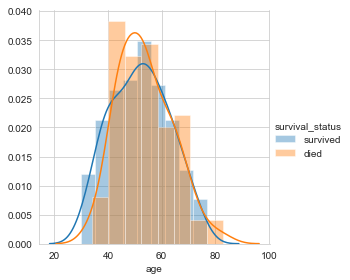

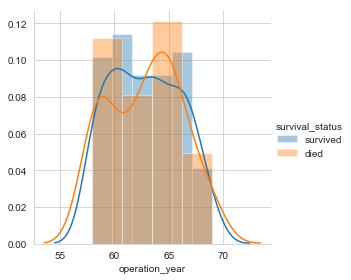

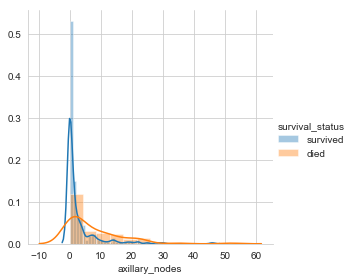

In [9]:
sns.set_style('whitegrid')

sns.FacetGrid(haberman, hue='survival_status', height=4) \
             .map(sns.distplot, 'age') \
             .add_legend()

sns.FacetGrid(haberman, hue='survival_status', height=4) \
             .map(sns.distplot, 'operation_year') \
             .add_legend()


sns.FacetGrid(haberman, hue='survival_status', height=4) \
             .map(sns.distplot, 'axillary_nodes') \
             .add_legend()

plt.show()

##### 3.1.1 Observation(s)

Age and Operation_year graphs:
* They both assume a normal distribution;
* Both of their classes overlap tremendously, therefore, they do not appear to be separable.

Axillary_nodes graph:
* It assumes a right skewed form;
* Both classes overlap;
* The PDF of the survived class is much higher in approx 0 axillary_nodes. 

#### 3.2 CDF
Based on the PDF plot, age and operation_year do not appear as promising for univariate analysis as axillary_nodes. Hence, only the axillary nodes' CDF is plotted for further visualization and analysis.

In [10]:
# divide the classes to perform separate analysis
haberman_survived = haberman.loc[haberman["survival_status"] == "survived"];
haberman_died = haberman.loc[haberman["survival_status"] == "died"];

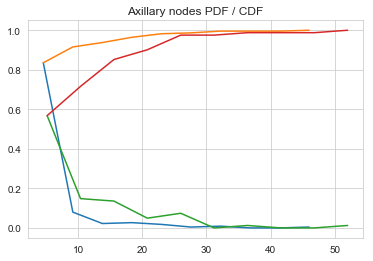

In [11]:
plt.figure(1)
plt.title('Axillary nodes PDF / CDF')

# survived
counts, bin_edges = np.histogram(haberman_survived.axillary_nodes, bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)

# died
counts, bin_edges = np.histogram(haberman_died.axillary_nodes, bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf)

plt.show()

##### 3.2.2 Observations

* At the 10 axillary nodes removal lies: approx 90% of all survivals and 70% of all non-survivals;
* With only one feature, it doens't seem to exist a basic model capable of separating both classes efficiently.

#### 3.3 Box and Whiskers

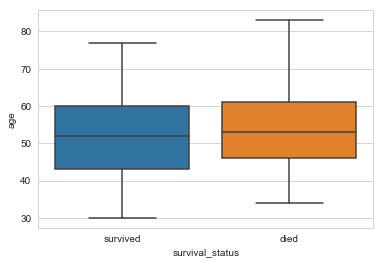

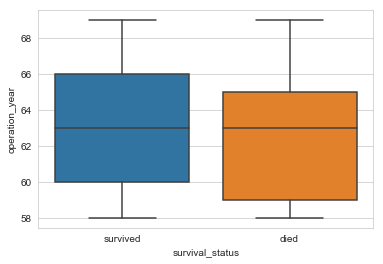

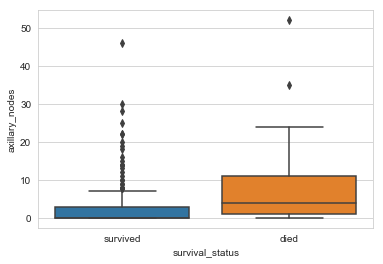

In [12]:
plt.close()

plt.figure(1)
sns.boxplot(x='survival_status', y='age', data=haberman)

plt.figure(2)
sns.boxplot(x='survival_status', y='operation_year', data=haberman)

plt.figure(3)
sns.boxplot(x='survival_status', y='axillary_nodes', data=haberman)

plt.show()

##### 3.3.1 Observations

Age graph:
* Both classes have a very similiar median, ranging between 52 - 54;
* Even though both classes' boxes are in a similiar range, older patients seem to die more frequently.

Operation year:
* Both classes seem to have an identical median, approx 63;
* Both classes lies in a similar range, but patients who have an older operation year, seem to die more frequently.

Axillary nodes:
* There are a significant number of outliers;
* It appears to be the most promising feature to reach the objective of this model;
* Patients that remove less axillary_nodes appears to have a higher survival chance;

#### 3.4 Violin

/Users/gustavo.fonseca/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


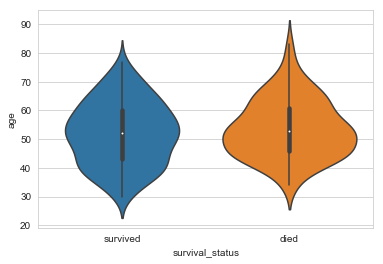

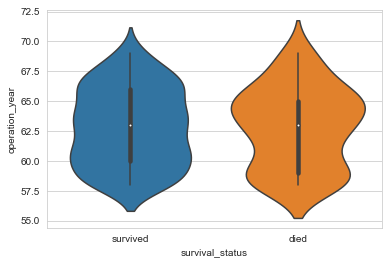

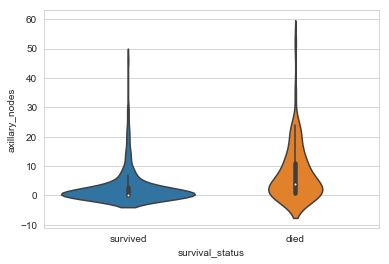

In [13]:
plt.close()

plt.figure(1)
sns.violinplot(x="survival_status", y="age", data=haberman, size=8)

plt.figure(2)
sns.violinplot(x="survival_status", y="operation_year", data=haberman, size=8)

plt.figure(3)
sns.violinplot(x="survival_status", y="axillary_nodes", data=haberman, size=8)

plt.show()

##### 3.4.1 Observations

* The violin plot shows that patients that remove 0 axillary nodes have a high probability of survival.

### 4. Bivariate analysis

#### 4.1 Pair plots

/Users/gustavo.fonseca/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


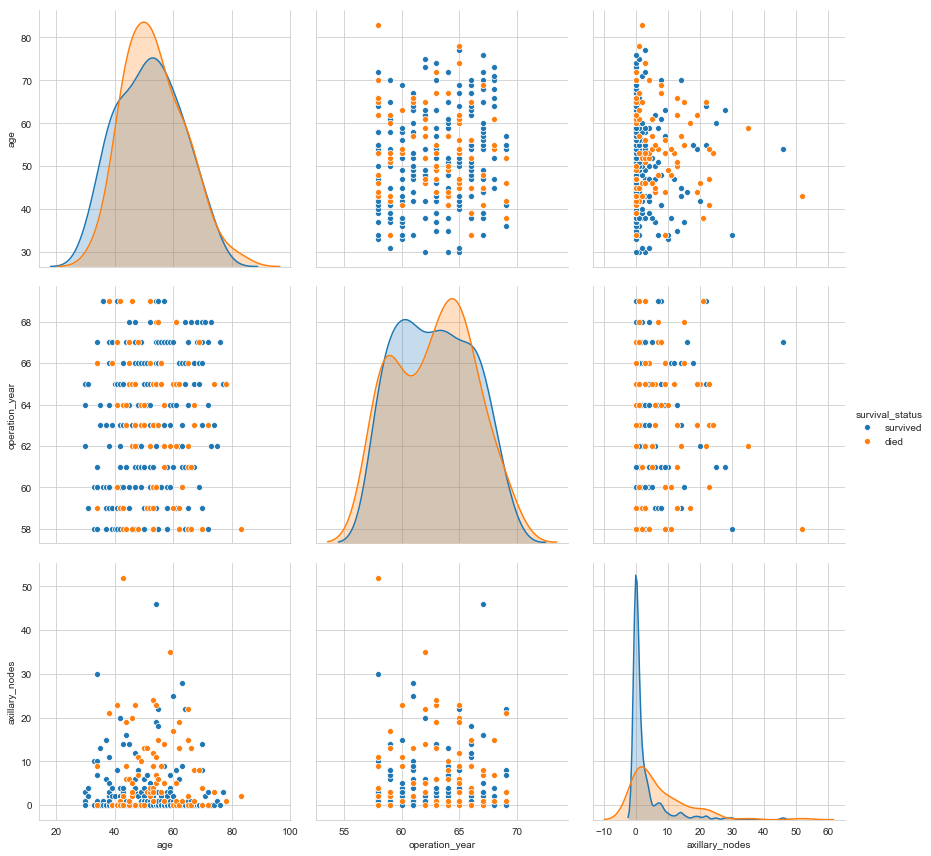

In [14]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="survival_status", height=4);
plt.show()

#### 4. 2 Observations

* Apparently there is no pair of features that could linearly separate both classes effectively;
* The most promising feature for classification seems to be axillary_nodes;
* We can't build a simple model with 'if' and 'else' to separate both classes efficiently.